In [34]:
library(tidyverse)
library(modelr)
options(na.action = na.warn)

### 간단한 모델

In [37]:
sim1 %>% print

# A tibble: 30 x 2
       x     y
   <int> <dbl>
 1     1  4.20
 2     1  7.51
 3     1  2.13
 4     2  8.99
 5     2 10.2 
 6     2 11.3 
 7     3  7.36
 8     3 10.5 
 9     3 10.5 
10     4 12.4 
# ... with 20 more rows


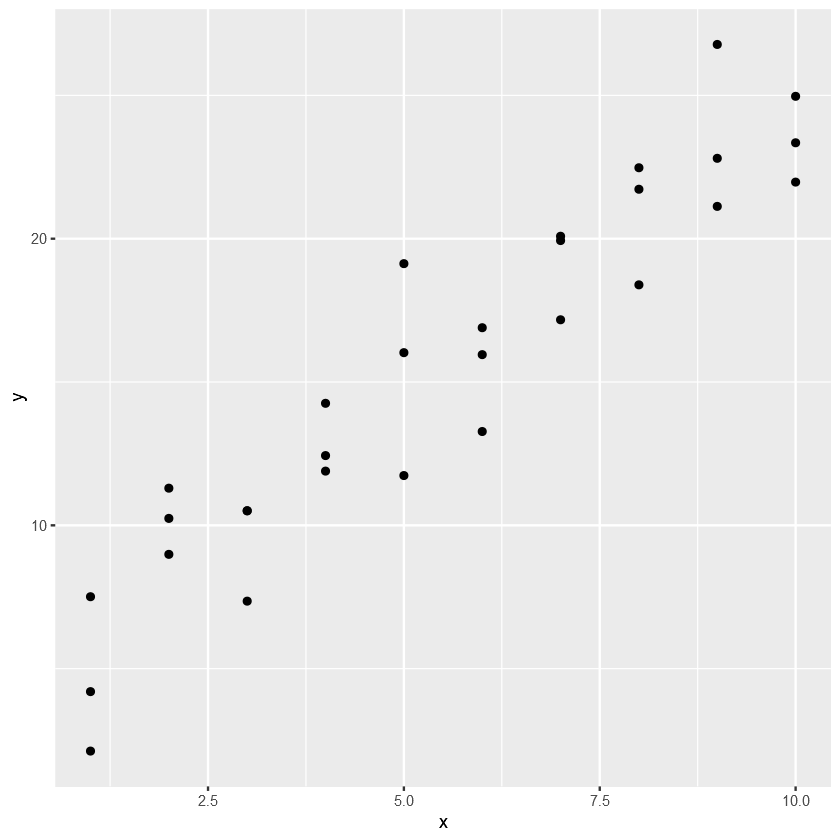

In [38]:
ggplot(sim1, aes(x, y)) + geom_point()

In [49]:
models <- tibble(
    a1 = runif(250, -20, 40),
    a2 = runif(250, -5, 5)
) %>% print

# A tibble: 250 x 2
       a1    a2
    <dbl> <dbl>
 1  -6.82  3.37
 2  22.2   2.43
 3  18.4   3.03
 4   7.99 -1.71
 5  26.1  -4.38
 6 -12.9  -3.21
 7  -5.69  1.92
 8  24.0   1.57
 9  12.4  -2.36
10 -12.5  -2.72
# ... with 240 more rows


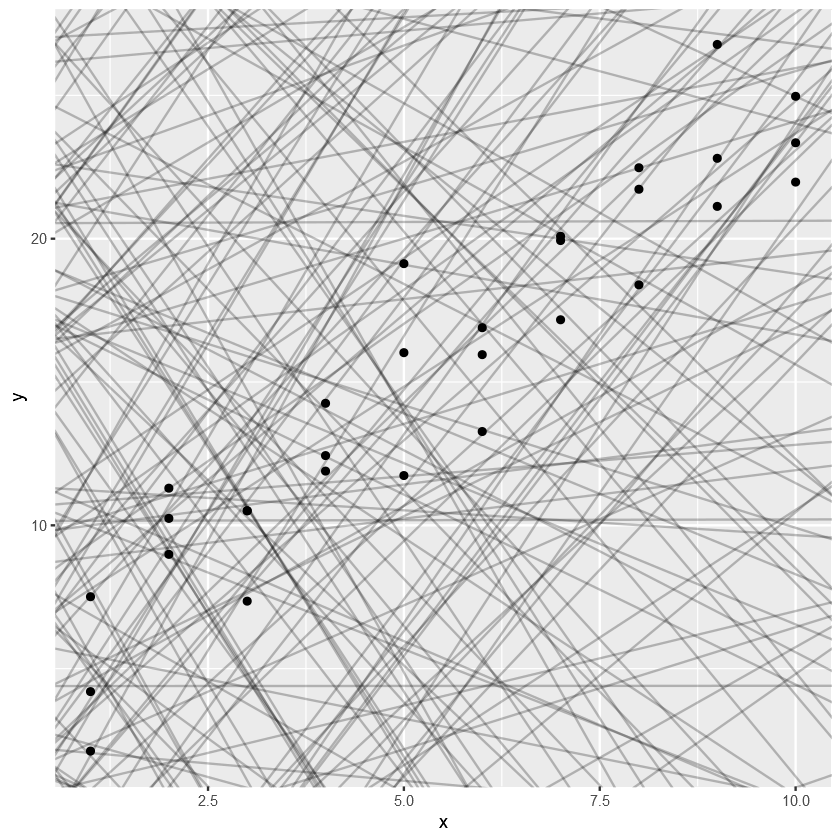

In [48]:
ggplot(sim1, aes(x, y)) + 
    geom_abline(
        aes(intercept = a1, slope = a2), data = models, alpha = 1/4
    ) + 
    geom_point()

In [39]:
model1 <- function(a, data) {
    a[1] + data$x * a[2]
}
model1(c(7, 1.5), sim1)

[1]  8.5  8.5  8.5 10.0 10.0 10.0 11.5 11.5 11.5 13.0 13.0 13.0 14.5 14.5 14.5
[16] 16.0 16.0 16.0 17.5 17.5 17.5 19.0 19.0 19.0 20.5 20.5 20.5 22.0 22.0 22.0

In [50]:
measure_distance <- function(mod, data) {
    diff <- data$y - model1(mod, data)
    sqrt(mean(diff ^ 2))
}
measure_distance(c(7, 1.5), sim1)

[1] 2.665212

In [41]:
sim1_dist <- function(a1, a2) {
    measure_distance(c(a1, a2), sim1)
}
models <- models %>%
    mutate(dist = purrr::map2_dbl(a1, a2, sim1_dist))
models %>% print

# A tibble: 250 x 3
      a1     a2  dist
   <dbl>  <dbl> <dbl>
 1 22.9  -3.29  18.8 
 2 25.6  -4.05  21.4 
 3 33.7   2.95  34.6 
 4  8.55  1.93   4.27
 5 30.3  -0.355 14.8 
 6 -8.87  2.52  10.8 
 7 15.9  -4.93  33.5 
 8 -1.78 -2.54  34.0 
 9 -3.49 -2.86  37.5 
10 20.8   0.515  9.49
# ... with 240 more rows


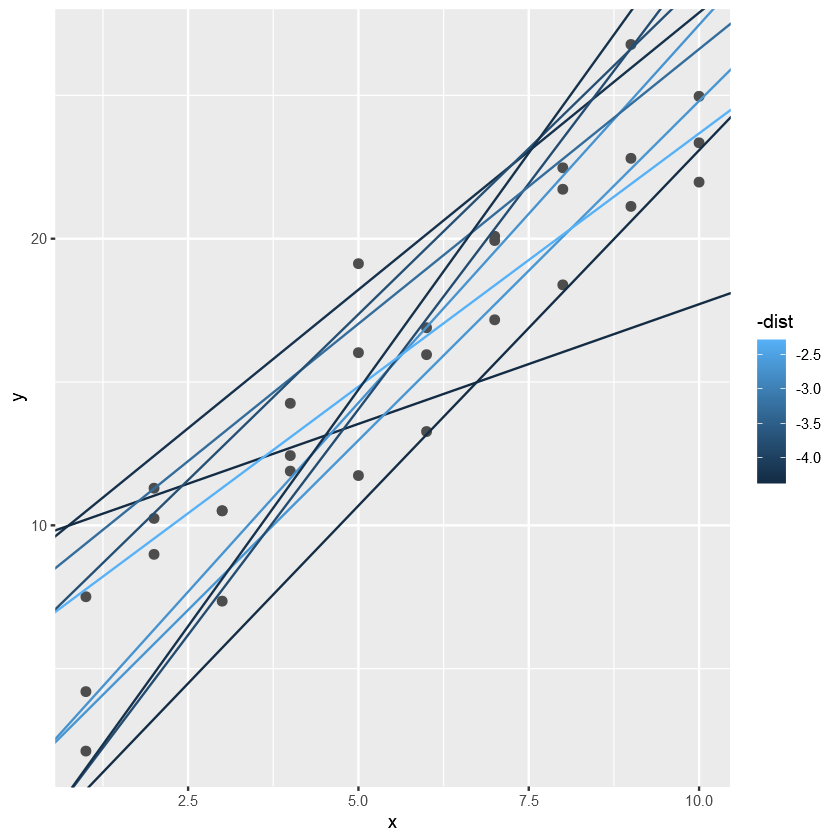

In [44]:
ggplot(sim1, aes(x, y)) + 
    geom_point(size = 2, color = "grey30") + 
    geom_abline(
        aes(intercept = a1, slope = a2, color = -dist),
        data = filter(models, rank(dist) <= 10)
    )

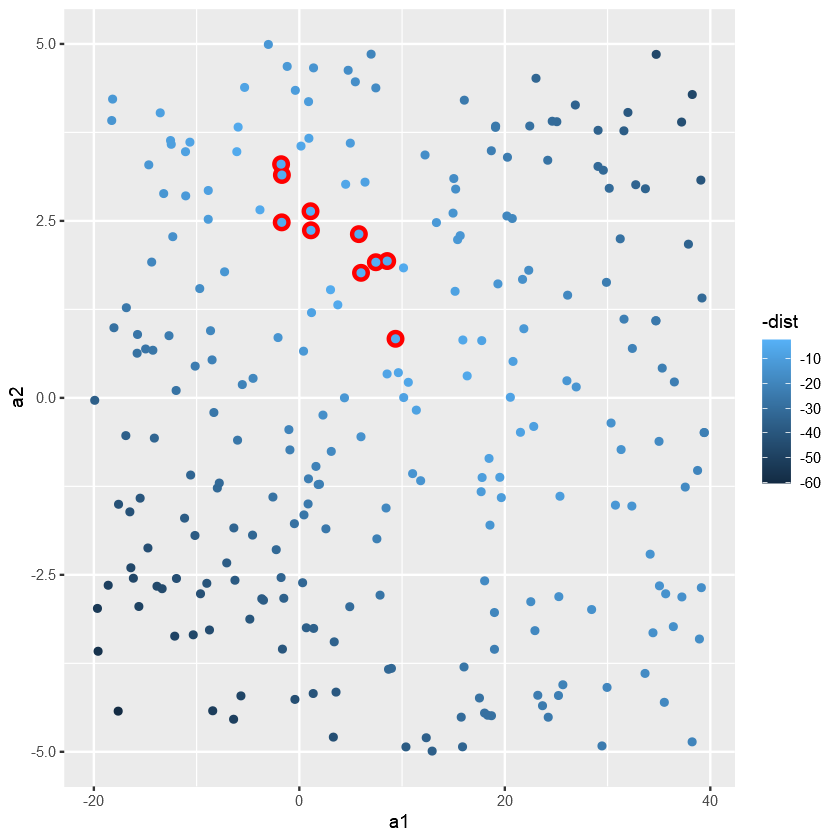

In [45]:
ggplot(models, aes(a1, a2)) +
    geom_point(
        data = filter(models, rank(dist) <= 10),
        size = 4, color = "red"
    ) + 
    geom_point(aes(colour = -dist))

### 그리드 서치 : 가장 좋은 모델이 어디에 잇는지 탐색, 그리드 파라미터 선택
### expand.grid()

In [46]:
grid <- expand.grid(
    a1 = seq(-5, 20, length = 25),
    a2 = seq(1, 3, length = 25)
    ) %>%
    mutate(dist = purrr::map2_dbl(a1, a2, sim1_dist))

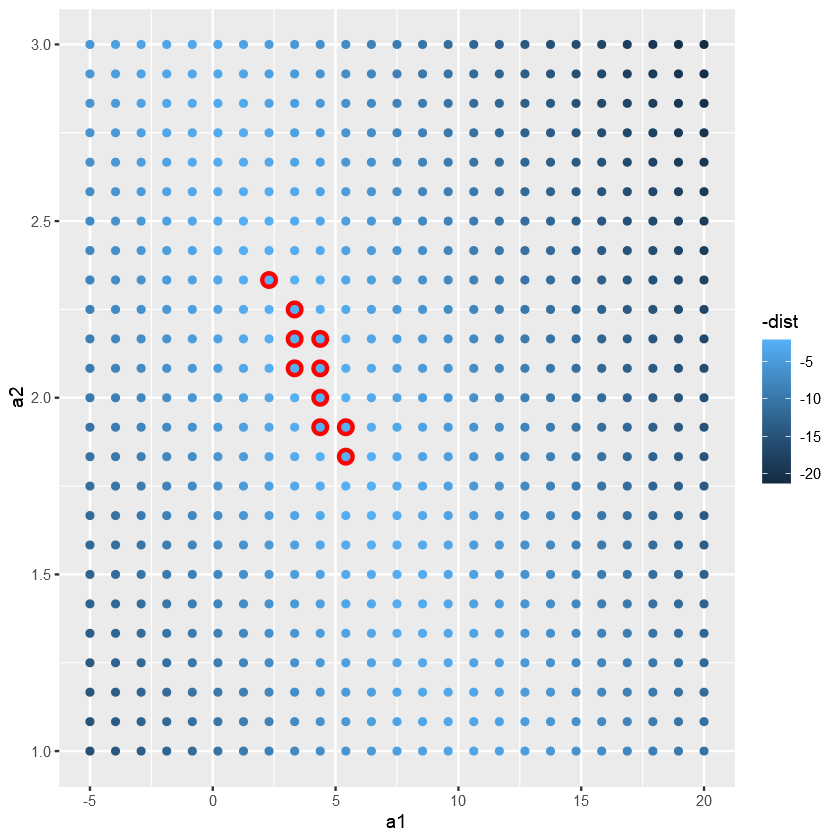

In [47]:
grid %>% 
    ggplot(aes(a1, a2)) + 
    geom_point(
        data = filter(grid, rank(dist) <= 10),
        size = 4, colour = "red"
    ) + 
    geom_point(aes(color = -dist))

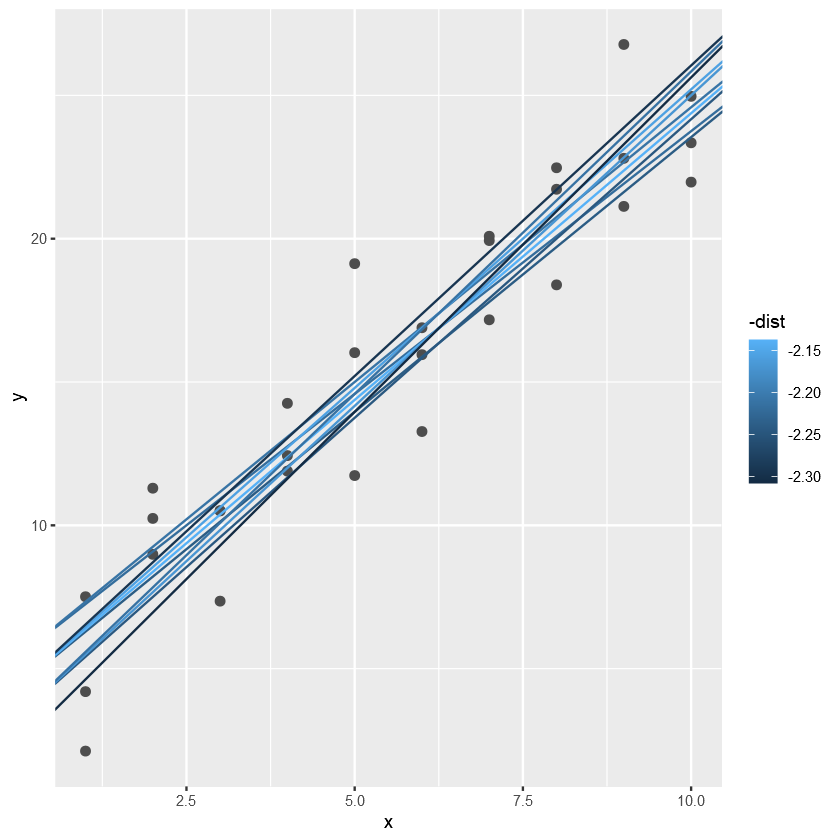

In [55]:
ggplot(sim1, aes(x, y)) + 
    geom_point(size = 2, color = "grey30") + 
    geom_abline(
        aes(intercept = a1, slope = a2, color = -dist),
        data = filter(grid, rank(dist) <= 10)
    )

### 뉴턴 랩슨 기법 : 시작점을 선택하고 가장 가파른 기울기를 찾기 위해 탐색, 가장 작은 값으로 갈 수 없을 때까지 기울기를 약간씩 기울이는 작업을 반복
### optim()

In [56]:
best <- optim(c(0, 0), measure_distance, data = sim1)
best$par

[1] 4.222248 2.051204

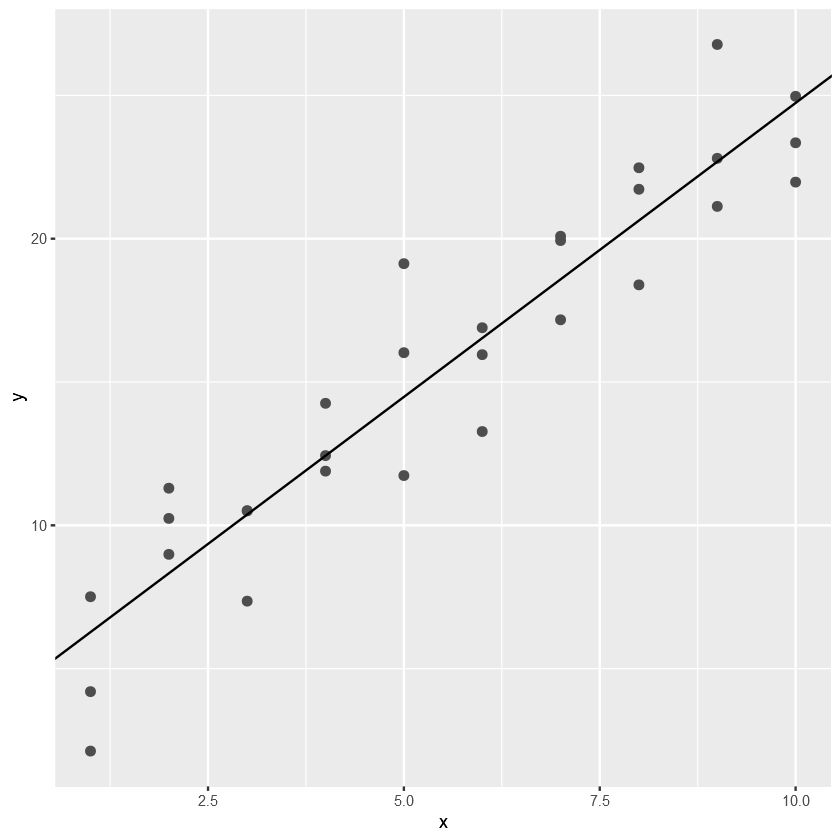

In [59]:
ggplot(sim1, aes(x, y)) + 
    geom_point(size = 2, color = "grey30") + 
    geom_abline(intercept = best$par[1], slope = best$par[2])

### 선형 모델

In [86]:
sim1_mod <- lm(y ~ x, data = sim1)
coef(sim1_mod)

(Intercept)           x 
   4.220822    2.051533

In [87]:
# 18.2.1
# 1
sim1a <- tibble(
    x = rep(1:10, each = 3),
    y = x * 1.5 + 6 + rt(length(x), df = 2) # t분포 (자유도 = 2) 난수
) %>% print

# A tibble: 30 x 2
       x     y
   <int> <dbl>
 1     1  9.13
 2     1  7.07
 3     1  7.43
 4     2  9.79
 5     2 14.6 
 6     2  9.75
 7     3  7.84
 8     3 19.3 
 9     3  8.55
10     4 11.6 
# ... with 20 more rows


`geom_smooth()` using formula 'y ~ x'



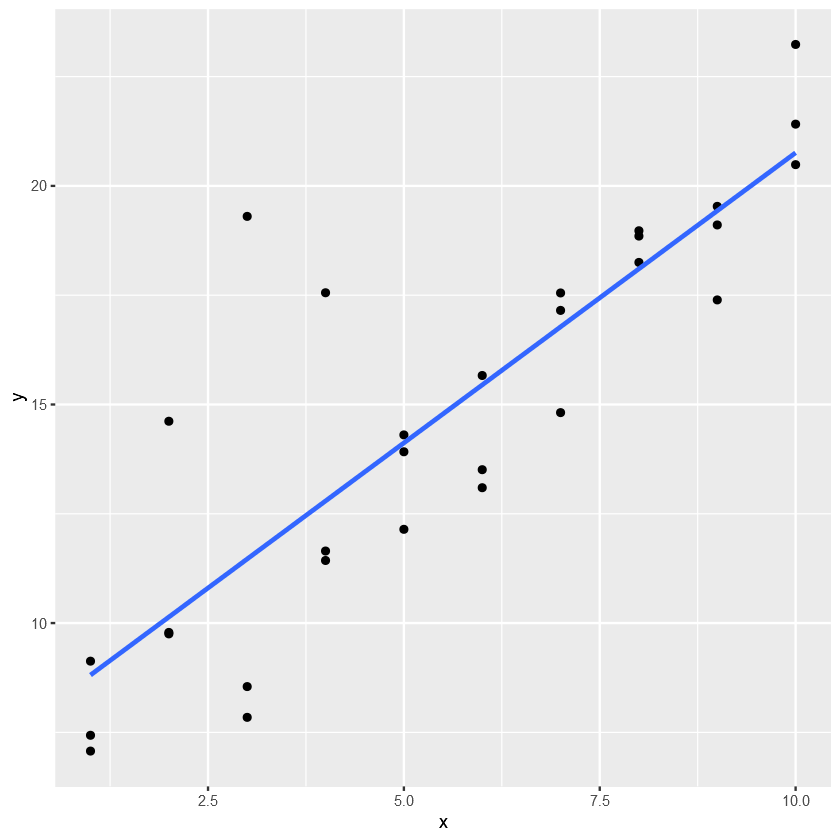

In [88]:
ggplot(sim1a, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'



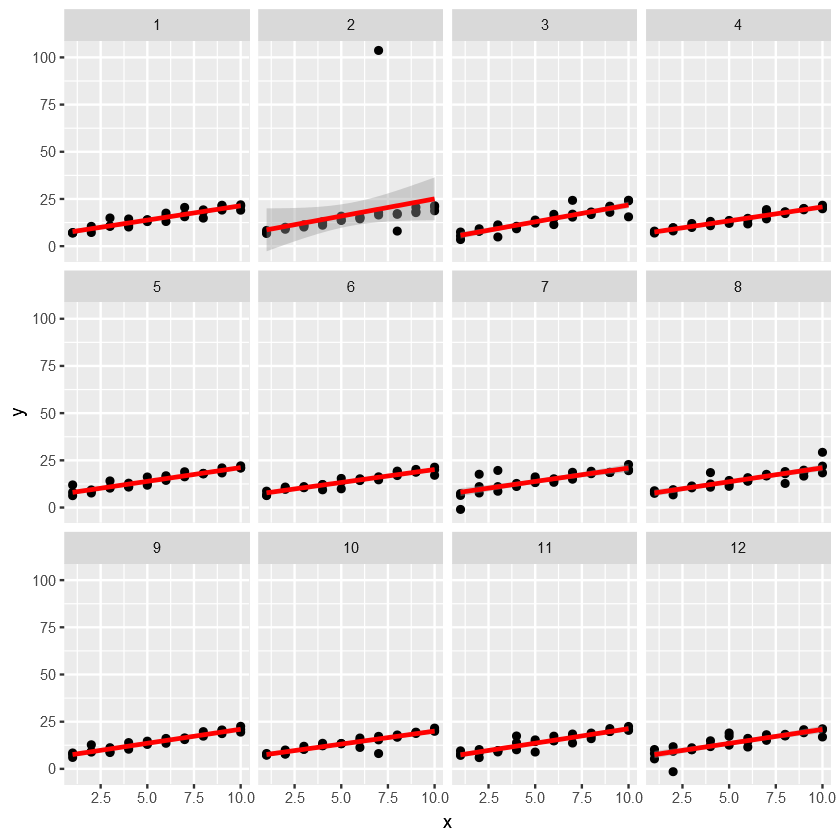

In [89]:
simt <- function(i) {
  tibble(
    x = rep(1:10, each = 3),
    y = x * 1.5 + 6 + rt(length(x), df = 2),
    .id = i
  )
}

sims <- map_df(1:12, simt)

ggplot(sims, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", colour = "red") +
  facet_wrap(~.id, ncol = 4)

`geom_smooth()` using formula 'y ~ x'



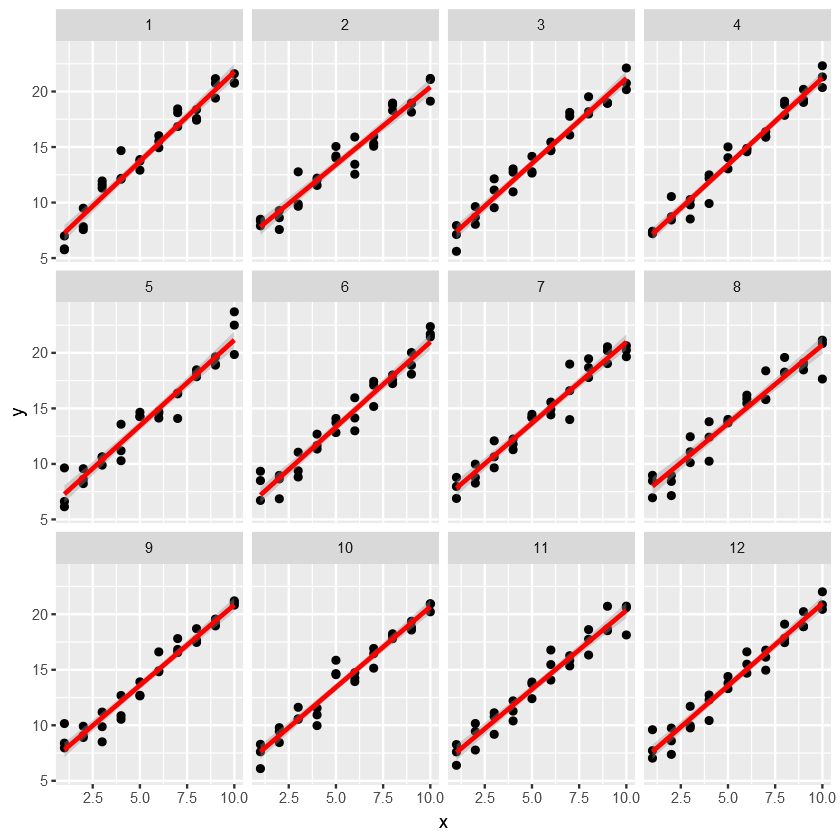

In [90]:
sim_norm <- function(i) {
  tibble(
    x = rep(1:10, each = 3),
    y = x * 1.5 + 6 + rnorm(length(x)),
    .id = i
  )
}

simdf_norm <- map_df(1:12, sim_norm)

ggplot(simdf_norm, aes(x = x, y = y)) +
  geom_point() +
  geom_smooth(method = "lm", colour = "red") +
  facet_wrap(~.id, ncol = 4)

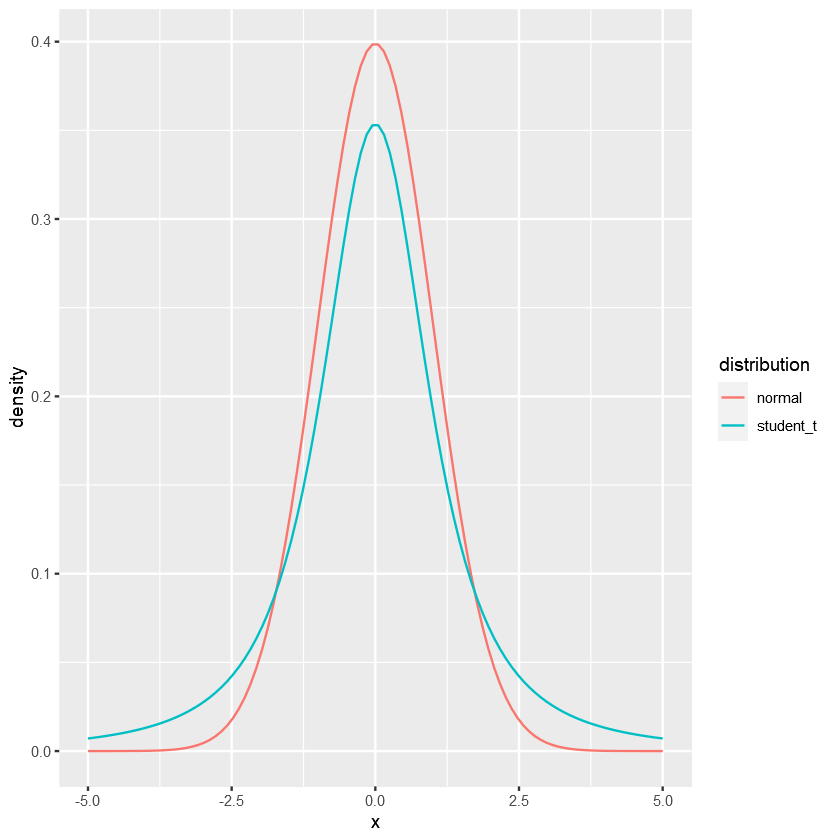

In [91]:
tibble(
  x = seq(-5, 5, length.out = 100),
  normal = dnorm(x),
  student_t = dt(x, df = 2)
) %>%
  pivot_longer(-x, names_to="distribution", values_to="density") %>%
  ggplot(aes(x = x, y = density, colour = distribution)) +
  geom_line()

In [92]:
pnorm(2, lower.tail = FALSE)
pt(2, df = 2, lower.tail = FALSE)

[1] 0.02275013

[1] 0.09175171

In [93]:
# 2
measure_distance <- function(mod, data) {
  diff <- data$y - make_prediction(mod, data)
  mean(abs(diff))
}

In [94]:
make_prediction <- function(mod, data) {
  mod[1] + mod[2] * data$x
}
best <- optim(c(0, 0), measure_distance, data = sim1a)
best$par

[1] 6.700033 1.443826

In [95]:
measure_distance_ls <- function(mod, data) {
  diff <- data$y - (mod[1] + mod[2] * data$x)
  sqrt(mean(diff^2))
}

best <- optim(c(0, 0), measure_distance_ls, data = sim1a)
best$par

[1] 7.484121 1.327263

### 모델 시각화

### 예측값
### data_grid() : 균일한 간격의 그리드 생성

In [96]:
grid <- sim1 %>% data_grid(x) %>% print

# A tibble: 10 x 1
       x
   <int>
 1     1
 2     2
 3     3
 4     4
 5     5
 6     6
 7     7
 8     8
 9     9
10    10


### add_predictions() : 데이터프레임과 모델을 인수로 갖는 예측값 추가

In [98]:
sim1_mod


Call:
lm(formula = y ~ x, data = sim1)

Coefficients:
(Intercept)            x  
      4.221        2.052  


In [97]:
grid <- grid %>% add_predictions(sim1_mod) %>% print

# A tibble: 10 x 2
       x  pred
   <int> <dbl>
 1     1  6.27
 2     2  8.32
 3     3 10.4 
 4     4 12.4 
 5     5 14.5 
 6     6 16.5 
 7     7 18.6 
 8     8 20.6 
 9     9 22.7 
10    10 24.7 


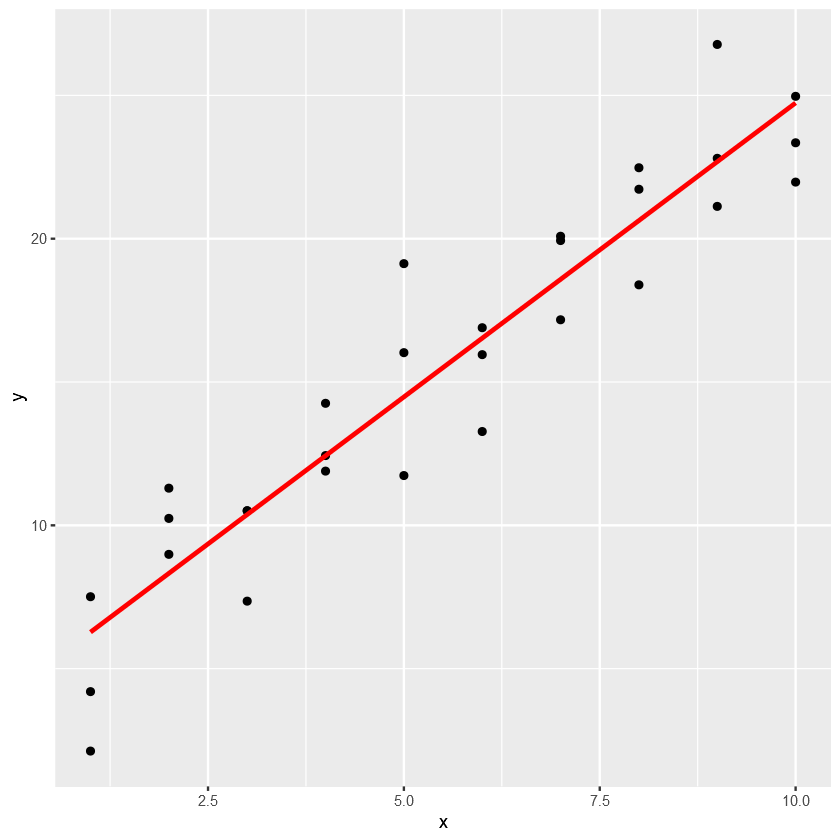

In [100]:
# 예측값을 그래프에 표시
ggplot(sim1, aes(x)) + 
    geom_point(aes(y = y)) + 
    geom_line(
        aes(y = pred),
        data = grid,
        colour = "red",
        size = 1
)

### 잔차
### add_residuals() : 데이터에 잔차 추가

In [102]:
sim1 <- sim1 %>% add_residuals(sim1_mod) 
sim1 %>% print

# A tibble: 30 x 3
       x     y    resid
   <int> <dbl>    <dbl>
 1     1  4.20 -2.07   
 2     1  7.51  1.24   
 3     1  2.13 -4.15   
 4     2  8.99  0.665  
 5     2 10.2   1.92   
 6     2 11.3   2.97   
 7     3  7.36 -3.02   
 8     3 10.5   0.130  
 9     3 10.5   0.136  
10     4 12.4   0.00763
# ... with 20 more rows


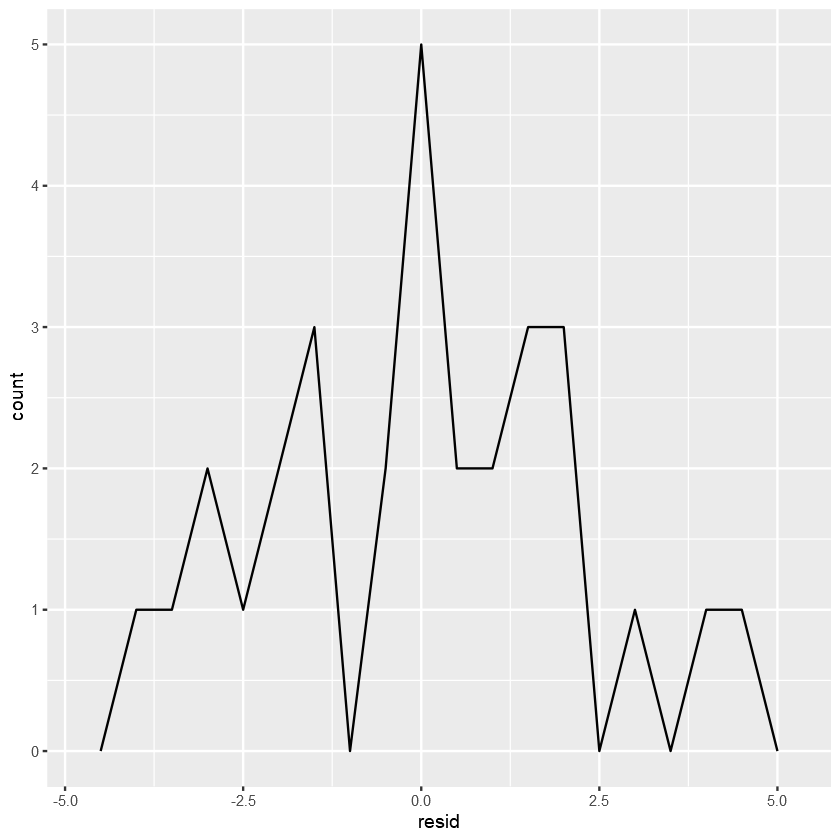

In [104]:
ggplot(sim1, aes(resid)) + 
    geom_freqpoly(binwidth = 0.5)

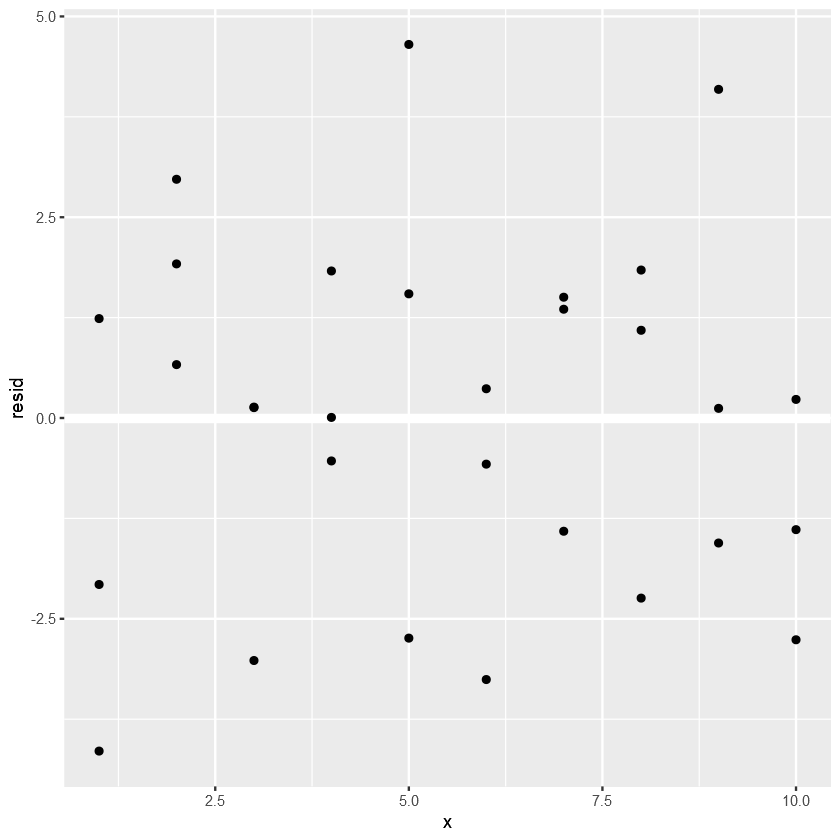

In [105]:
ggplot(sim1, aes(x, resid)) + 
    geom_ref_line(h = 0) + geom_point()

### loess(y ~ x) : 평활 곡선

In [107]:
sim1_loess <- loess(y ~ x, data = sim1)
sim1_lm <- lm(y ~ x, data = sim1)

grid_loess <- sim1 %>%
  add_predictions(sim1_loess)

sim1 <- sim1 %>%
  add_residuals(sim1_lm) %>%
  add_predictions(sim1_lm) %>%
  add_residuals(sim1_loess, var = "resid_loess") %>%
  add_predictions(sim1_loess, var = "pred_loess")
sim1 %>% print

# A tibble: 30 x 6
       x     y    resid  pred resid_loess pred_loess
   <int> <dbl>    <dbl> <dbl>       <dbl>      <dbl>
 1     1  4.20 -2.07     6.27      -1.14        5.34
 2     1  7.51  1.24     6.27       2.17        5.34
 3     1  2.13 -4.15     6.27      -3.21        5.34
 4     2  8.99  0.665    8.32       0.714       8.27
 5     2 10.2   1.92     8.32       1.97        8.27
 6     2 11.3   2.97     8.32       3.02        8.27
 7     3  7.36 -3.02    10.4       -3.45       10.8 
 8     3 10.5   0.130   10.4       -0.304      10.8 
 9     3 10.5   0.136   10.4       -0.298      10.8 
10     4 12.4   0.00763 12.4       -0.345      12.8 
# ... with 20 more rows


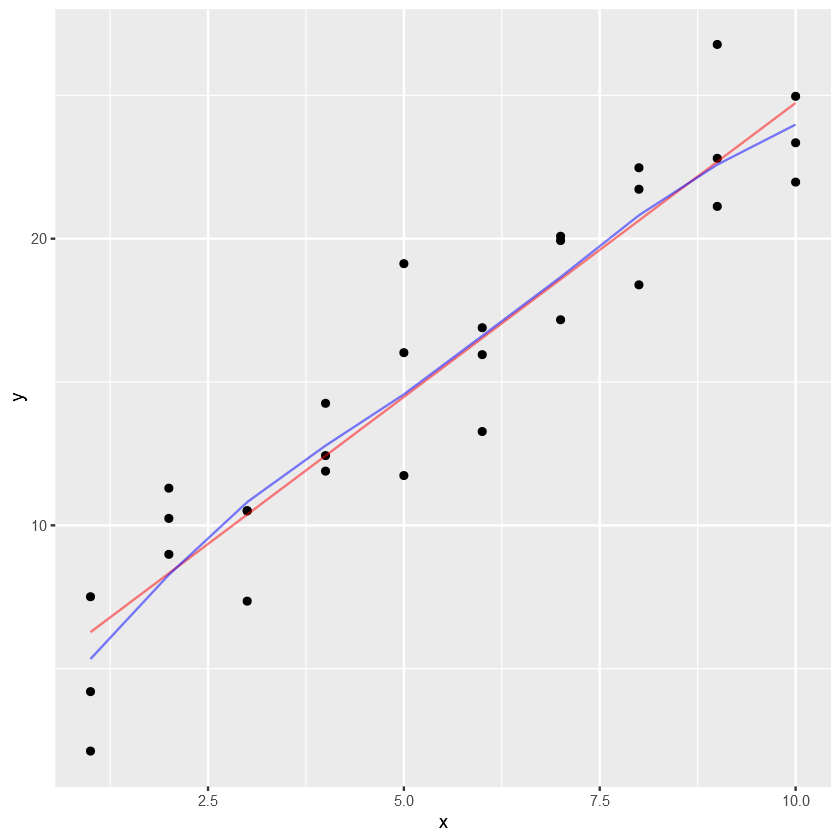

In [115]:
plot_sim1_loess <-
  ggplot(sim1, aes(x = x, y = y)) +
  geom_point() +
  geom_line(aes(x = x, y = pred), data = sim1, colour = "red", alpha = 0.5) +
  geom_line(aes(x = x, y = pred_loess), data = sim1, colour = "blue", alpha = 0.5)
plot_sim1_loess

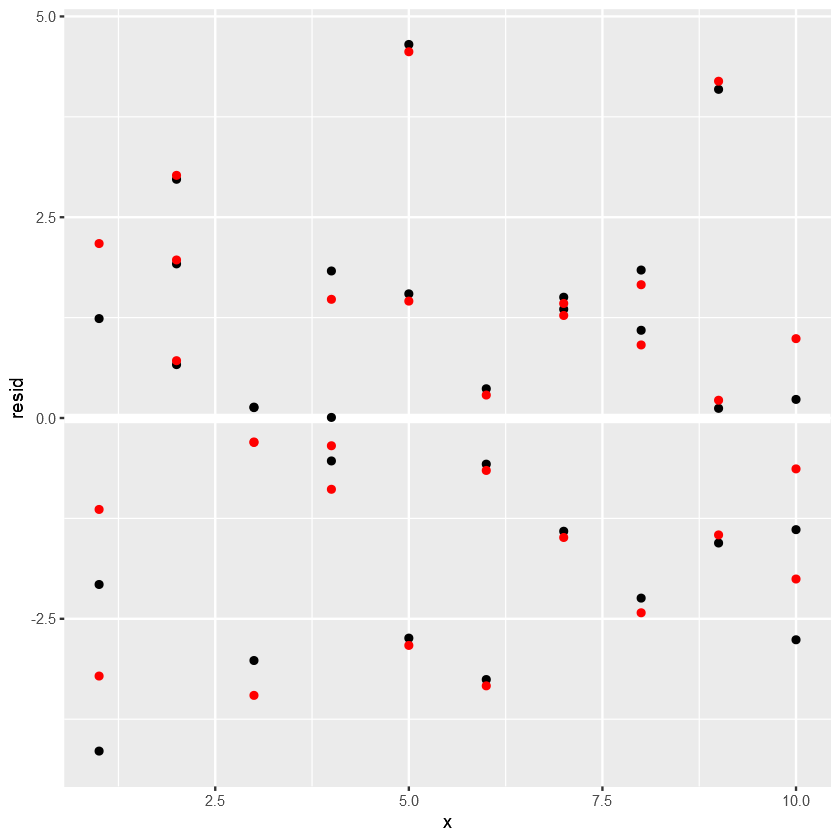

In [110]:
ggplot(sim1, aes(x = x)) +
  geom_ref_line(h = 0) +
  geom_point(aes(y = resid)) +
  geom_point(aes(y = resid_loess), colour = "red")

In [116]:
# 2
sim1_mod <- lm(y ~ x, data = sim1)
grid <- sim1 %>%
  data_grid(x)

In [118]:
grid %>%
  add_predictions(sim1_mod, var = "pred_lm") %>%
  add_predictions(sim1_loess, var = "pred_loess") 

x,pred_lm,pred_loess
<int>,<dbl>,<dbl>
1,6.272355,5.338000
2,8.323888,8.274913
3,10.375421,10.809582
4,12.426954,12.779762
5,14.478487,14.569125
6,16.530020,16.608674
7,18.581553,18.659348
8,20.633087,20.815760
9,22.684620,22.583429


### gather_predictions() 함수는 결과를 누적하고 모델 이름이 있는 열을 추가하여 여러 모델의 예측을 추가.

In [120]:
grid %>%
  gather_predictions(sim1_mod, sim1_loess) %>% print

# A tibble: 20 x 3
   model          x  pred
   <chr>      <int> <dbl>
 1 sim1_mod       1  6.27
 2 sim1_mod       2  8.32
 3 sim1_mod       3 10.4 
 4 sim1_mod       4 12.4 
 5 sim1_mod       5 14.5 
 6 sim1_mod       6 16.5 
 7 sim1_mod       7 18.6 
 8 sim1_mod       8 20.6 
 9 sim1_mod       9 22.7 
10 sim1_mod      10 24.7 
11 sim1_loess     1  5.34
12 sim1_loess     2  8.27
13 sim1_loess     3 10.8 
14 sim1_loess     4 12.8 
15 sim1_loess     5 14.6 
16 sim1_loess     6 16.6 
17 sim1_loess     7 18.7 
18 sim1_loess     8 20.8 
19 sim1_loess     9 22.6 
20 sim1_loess    10 24.0 


### Spread_predictions() 함수는 각 모델의 예측과 함께 여러 열(모델 이름 접미사)을 추가하여 여러 모델의 예측을 추가.

In [121]:
grid %>%
  spread_predictions(sim1_mod, sim1_loess)

x,sim1_mod,sim1_loess
<int>,<dbl>,<dbl>
1,6.272355,5.338000
2,8.323888,8.274913
3,10.375421,10.809582
4,12.426954,12.779762
5,14.478487,14.569125
6,16.530020,16.608674
7,18.581553,18.659348
8,20.633087,20.815760
9,22.684620,22.583429


In [122]:
grid %>%
  gather_predictions(sim1_mod, sim1_loess) %>%
  spread(model, pred)

x,sim1_loess,sim1_mod
<int>,<dbl>,<dbl>
1,5.338000,6.272355
2,8.274913,8.323888
3,10.809582,10.375421
4,12.779762,12.426954
5,14.569125,14.478487
6,16.608674,16.530020
7,18.659348,18.581553
8,20.815760,20.633087
9,22.583429,22.684620


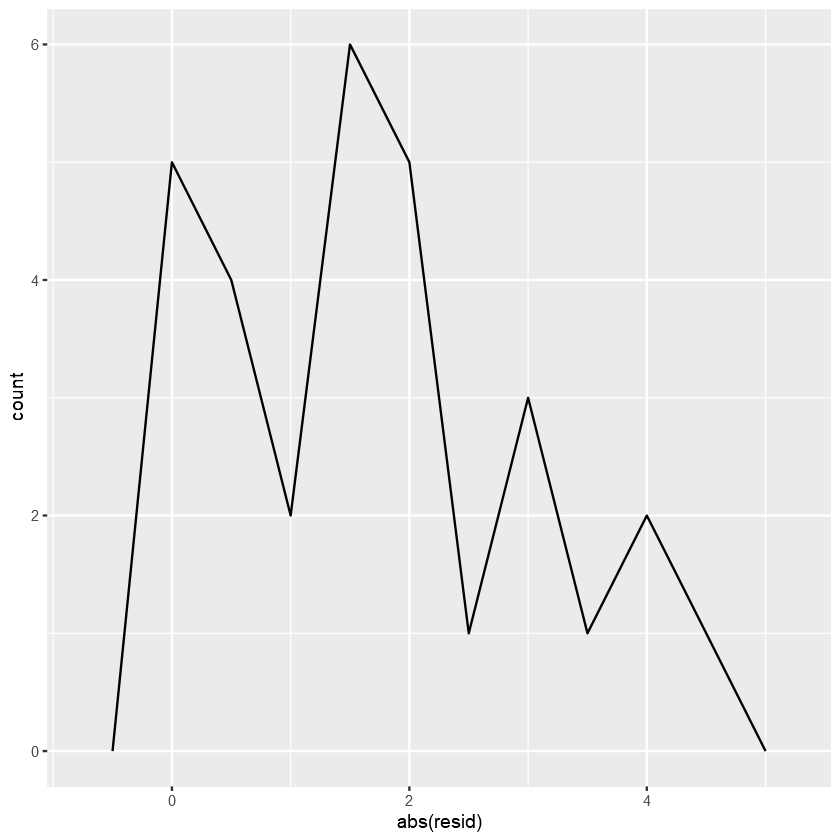

In [123]:
# 4
sim1_mod <- lm(y ~ x, data = sim1)

sim1 <- sim1 %>%
  add_residuals(sim1_mod)

ggplot(sim1, aes(x = abs(resid))) +
  geom_freqpoly(binwidth = 0.5)

### 수식과 모델 모음
### model_matrix(df, y ~ x) : 모델 방정식을 정의하는 티블을 반환
- 기본적으로 R은 항상 1인 열을 추가, 이를 원하지 않는다면 -1을 사용하여 제거

In [124]:
df <- tribble(
    ~y, ~x1, ~x2,
    4, 2, 5,
    5, 1, 6
)
model_matrix(df, y ~ x1)

(Intercept),x1
<dbl>,<dbl>
1,2
1,1


In [130]:
model_matrix(df, y ~ x1 - 1)

x1
<dbl>
2
1


In [131]:
model_matrix(df, y ~ x1 + x2)

(Intercept),x1,x2
<dbl>,<dbl>,<dbl>
1,2,5
1,1,6


### 범주형 변수
- model_matrix를 사용하면 자동으로 가변수화

In [132]:
df <- tribble(
    ~sex, ~response,
    "male", 1,
    "female", 2,
    "male", 1
)
model_matrix(df, response ~ sex)

(Intercept),sexmale
<dbl>,<dbl>
1,1
1,0
1,1


In [137]:
sim2 %>% print
unique(sim2$x)

# A tibble: 40 x 2
   x          y
   <chr>  <dbl>
 1 a      1.94 
 2 a      1.18 
 3 a      1.24 
 4 a      2.62 
 5 a      1.11 
 6 a      0.866
 7 a     -0.910
 8 a      0.721
 9 a      0.687
10 a      2.07 
# ... with 30 more rows


[1] "a" "b" "c" "d"

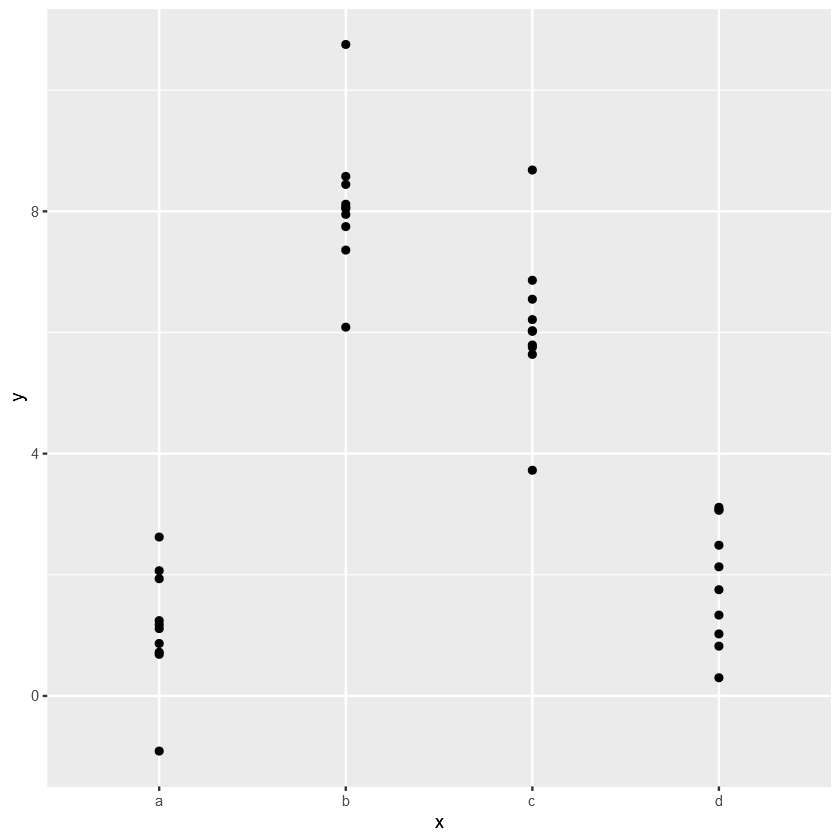

In [138]:
ggplot(sim2) + geom_point(aes(x, y))

In [139]:
mod2 <- lm(y ~ x, sim2)

grid <- sim2 %>%
    data_grid(x) %>%
    add_predictions(mod2)
grid %>% print

# A tibble: 4 x 2
  x      pred
  <chr> <dbl>
1 a      1.15
2 b      8.12
3 c      6.13
4 d      1.91


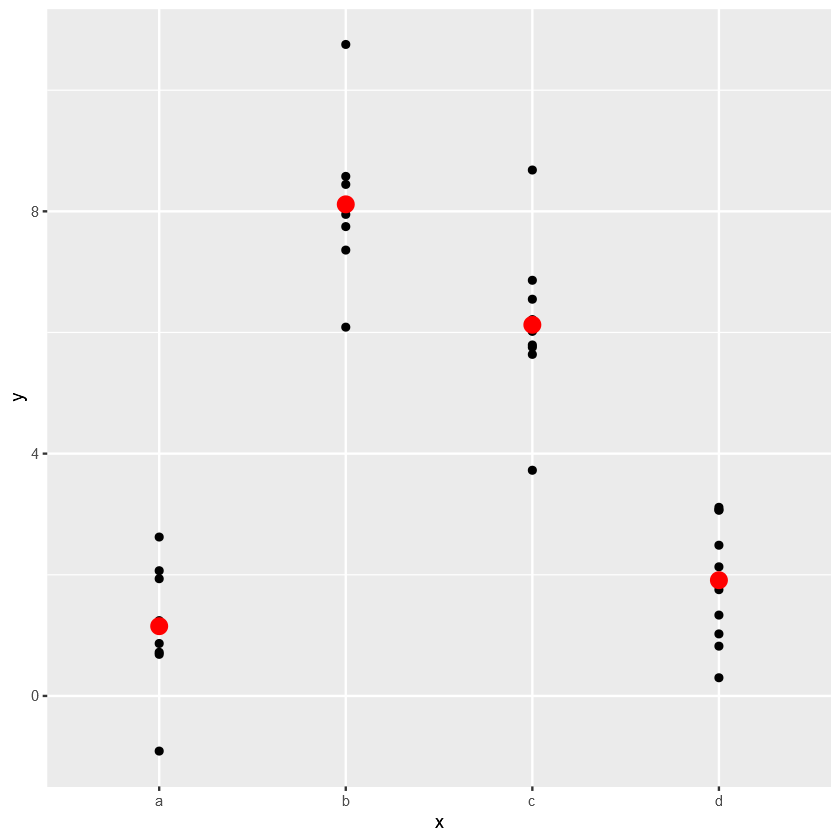

In [140]:
ggplot(sim2, aes(x)) + 
    geom_point(aes(y = y)) +
    geom_point(
        data = grid, aes(y = pred), color = "red", size = 4)

### 연속형과 범주형 변수의 상호작용

In [142]:
sim3 %>% print

# A tibble: 120 x 5
      x1 x2      rep      y    sd
   <int> <fct> <int>  <dbl> <dbl>
 1     1 a         1 -0.571     2
 2     1 a         2  1.18      2
 3     1 a         3  2.24      2
 4     1 b         1  7.44      2
 5     1 b         2  8.52      2
 6     1 b         3  7.72      2
 7     1 c         1  6.51      2
 8     1 c         2  5.79      2
 9     1 c         3  6.07      2
10     1 d         1  2.11      2
# ... with 110 more rows


In [146]:
unique(sim3$x1) ; unique(sim3$x2) ; unique(sim3$sd)

[1]  1  2  3  4  5  6  7  8  9 10

[1] a b c d
Levels: a b c d

[1] 2

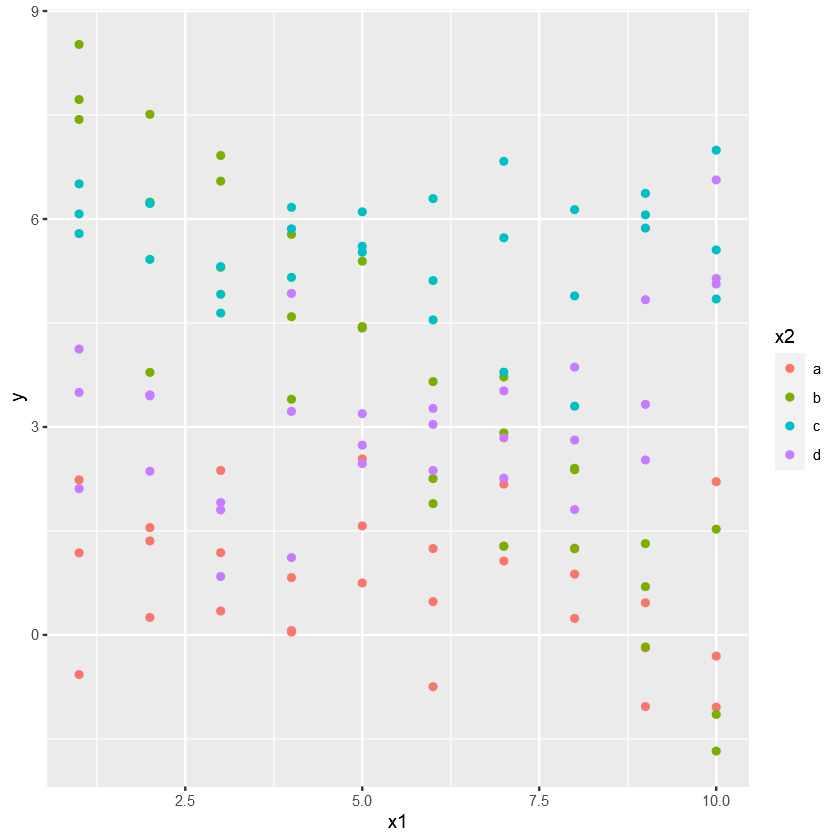

In [147]:
ggplot(sim3, aes(x1, y)) + geom_point(aes(color = x2))

In [149]:
mod1 <- lm(y ~ x1 + x2, data = sim3)
mod2 <- lm(y ~ x1 * x2, data = sim3)

#### 이 모델을 시각화 하기 위해서
1. 두개의 예측 변수에 대해 data_grid()를 적용
2. 두 모델로 동시에 예측값을 생성하기 위해서 행으로 각 예측값을 추가하는 gather_predictions()를 사용, 
3. spread_predictions()는 gather_predictions()를 보완

In [155]:
grid <- sim3 %>% 
    data_grid(x1, x2) %>%
    gather_predictions(mod1, mod2)

In [156]:
grid %>% print

# A tibble: 80 x 4
   model    x1 x2     pred
   <chr> <int> <fct> <dbl>
 1 mod1      1 a      1.67
 2 mod1      1 b      4.56
 3 mod1      1 c      6.48
 4 mod1      1 d      4.03
 5 mod1      2 a      1.48
 6 mod1      2 b      4.37
 7 mod1      2 c      6.28
 8 mod1      2 d      3.84
 9 mod1      3 a      1.28
10 mod1      3 b      4.17
# ... with 70 more rows


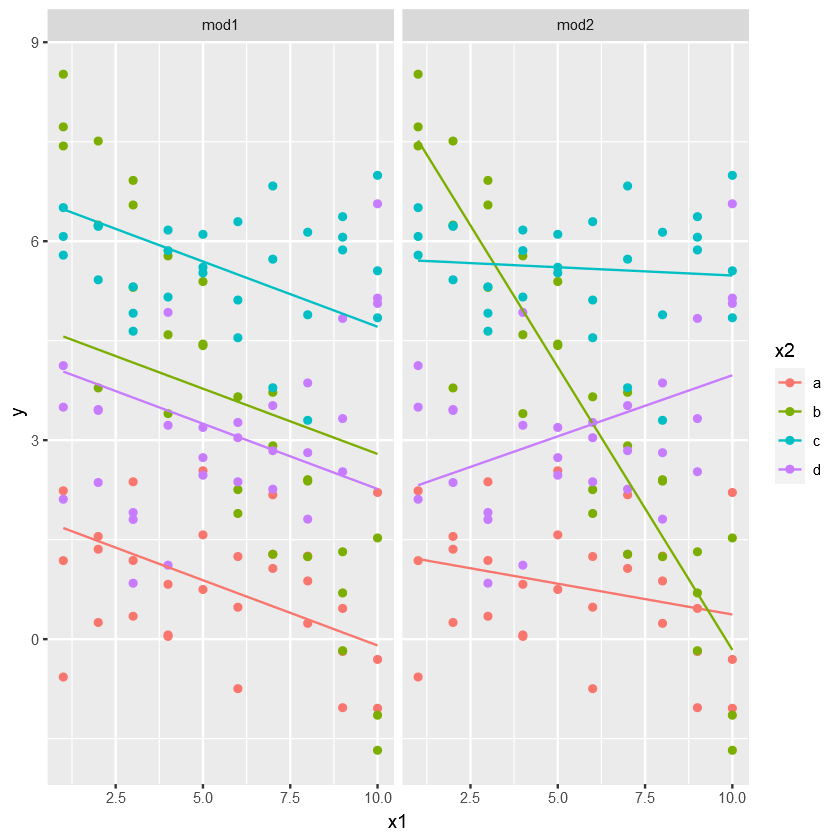

In [157]:
ggplot(sim3, aes(x1, y, color = x2)) + 
    geom_point() +
    geom_line(data = grid, aes(y = pred)) + 
    facet_wrap(~ model)

In [158]:
sim3 <- sim3 %>%
    gather_residuals(mod1, mod2)
sim3 %>% print

# A tibble: 240 x 7
   model    x1 x2      rep      y    sd   resid
   <chr> <int> <fct> <int>  <dbl> <dbl>   <dbl>
 1 mod1      1 a         1 -0.571     2 -2.25  
 2 mod1      1 a         2  1.18      2 -0.491 
 3 mod1      1 a         3  2.24      2  0.562 
 4 mod1      1 b         1  7.44      2  2.87  
 5 mod1      1 b         2  8.52      2  3.96  
 6 mod1      1 b         3  7.72      2  3.16  
 7 mod1      1 c         1  6.51      2  0.0261
 8 mod1      1 c         2  5.79      2 -0.691 
 9 mod1      1 c         3  6.07      2 -0.408 
10 mod1      1 d         1  2.11      2 -1.92  
# ... with 230 more rows


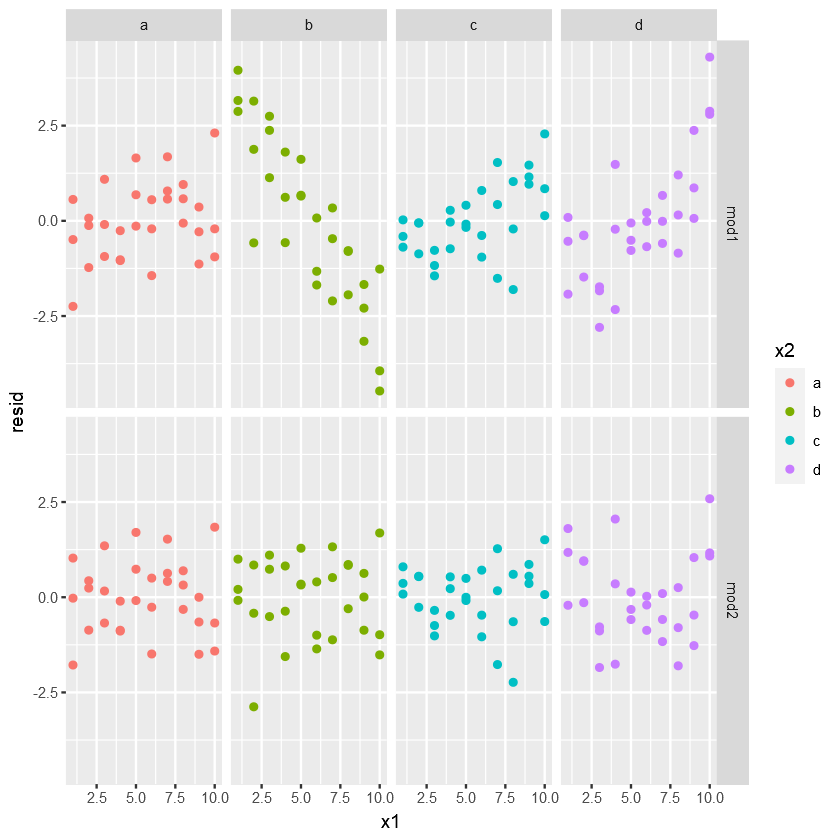

In [159]:
ggplot(sim3, aes(x1, resid, color = x2)) + 
    geom_point() + 
    facet_grid(model ~ x2)

### seq_range(x, n) : 최솟값과 최댓값 사이를 균일하게 간격을 나눈 n개로 나눔
- pretty = TRUE : 보기 좋은 시퀀스, 테이블로 결과물을 생성하려는 경우에 유용
- trim = 0.1 : 꼬리값의 10%를 제거, 변수가 꼬리가 긴 분포를 가지고 있으며, 중심 근처의 값을 생성하고자 하는 경우 유용
- expand = 0.1 : trim()의 반대, 범위를 10% 확장

In [171]:
seq_range(c(0.0123, 0.923423), n = 5)
seq_range(c(0.0123, 0.923423), n = 5, pretty = TRUE)

[1] 0.0123000 0.2400808 0.4678615 0.6956423 0.9234230

[1] 0.0 0.2 0.4 0.6 0.8 1.0

In [173]:
x1 <- rcauchy(100)
seq_range(x1, n = 5)
seq_range(x1, n = 5, trim = 0.1)
seq_range(x1, n = 5, trim = 0.25)
seq_range(x1, n = 5, trim = 0.5)

[1]  -12.38609  395.61862  803.62333 1211.62803 1619.63274

[1] -6.556242 -1.636185  3.283872  8.203929 13.123986

[1] -2.17155216 -1.11594677 -0.06034138  0.99526401  2.05086941

[1] -1.1779704 -0.6471802 -0.1163900  0.4144002  0.9451904

### 연속형 변수의 상호작용

In [160]:
sim4 %>% print

# A tibble: 300 x 4
      x1     x2   rep       y
   <dbl>  <dbl> <int>   <dbl>
 1    -1 -1         1  4.25  
 2    -1 -1         2  1.21  
 3    -1 -1         3  0.353 
 4    -1 -0.778     1 -0.0467
 5    -1 -0.778     2  4.64  
 6    -1 -0.778     3  1.38  
 7    -1 -0.556     1  0.975 
 8    -1 -0.556     2  2.50  
 9    -1 -0.556     3  2.70  
10    -1 -0.333     1  0.558 
# ... with 290 more rows


In [174]:
mod1 <- lm(y ~ x1 + x2, sim4)
mod2 <- lm(y ~ x1 * x2, sim4)

grid <- sim4 %>%
    data_grid(
        x1 = seq_range(x1, 5),
        x2 = seq_range(x2, 5)
    ) %>% 
    gather_predictions(mod1, mod2)
grid %>% print

# A tibble: 50 x 4
   model    x1    x2   pred
   <chr> <dbl> <dbl>  <dbl>
 1 mod1   -1    -1    0.996
 2 mod1   -1    -0.5 -0.395
 3 mod1   -1     0   -1.79 
 4 mod1   -1     0.5 -3.18 
 5 mod1   -1     1   -4.57 
 6 mod1   -0.5  -1    1.91 
 7 mod1   -0.5  -0.5  0.516
 8 mod1   -0.5   0   -0.875
 9 mod1   -0.5   0.5 -2.27 
10 mod1   -0.5   1   -3.66 
# ... with 40 more rows


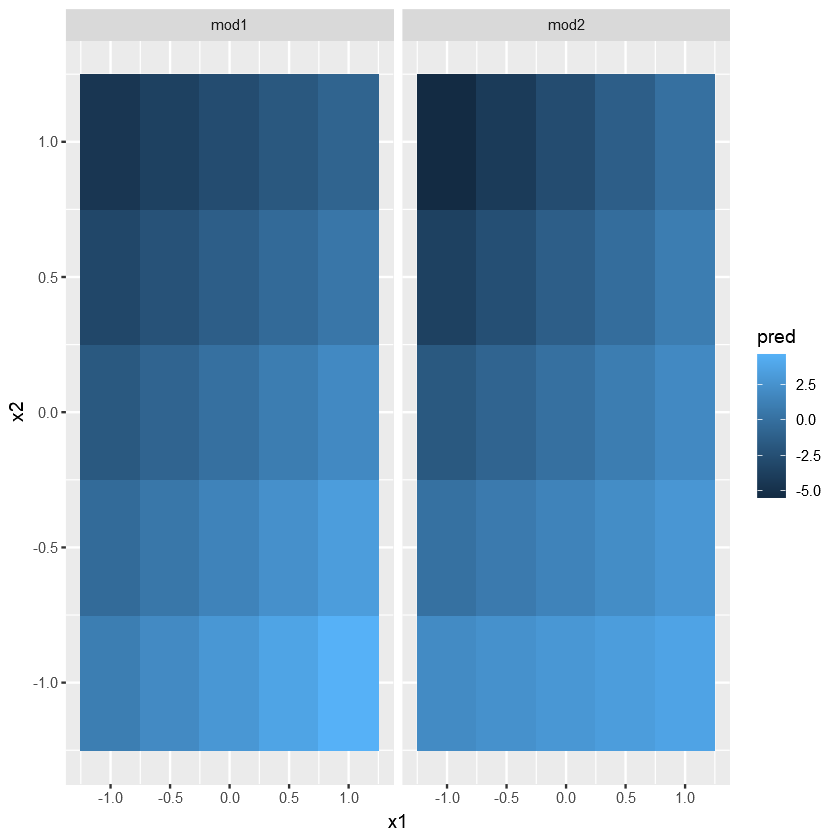

In [175]:
ggplot(grid, aes(x1, x2)) + 
    geom_tile(aes(fill = pred)) + 
    facet_wrap(~ model)

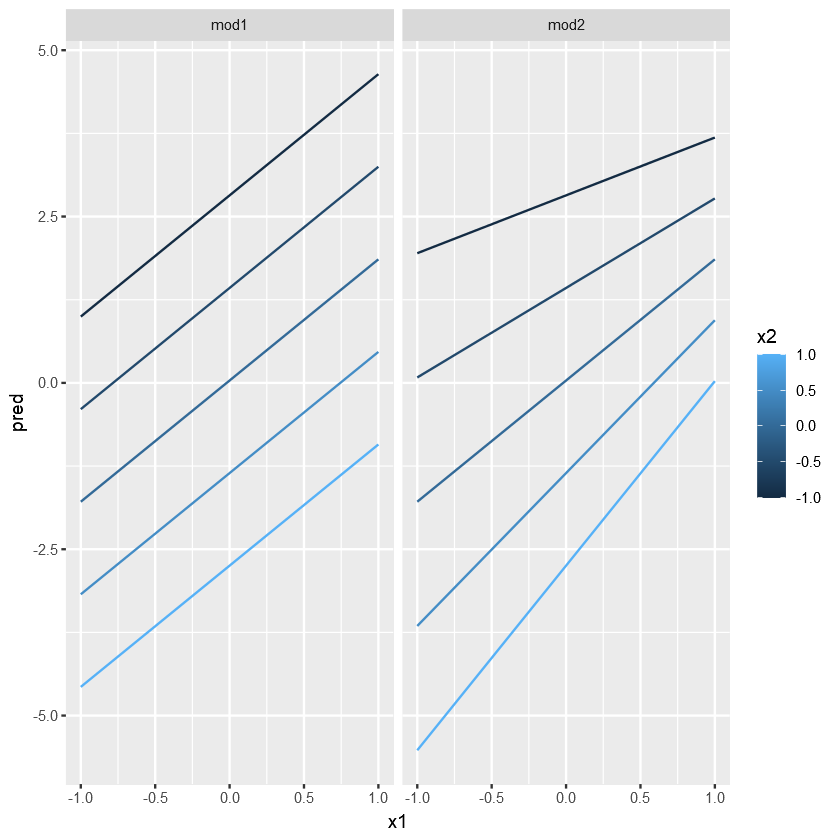

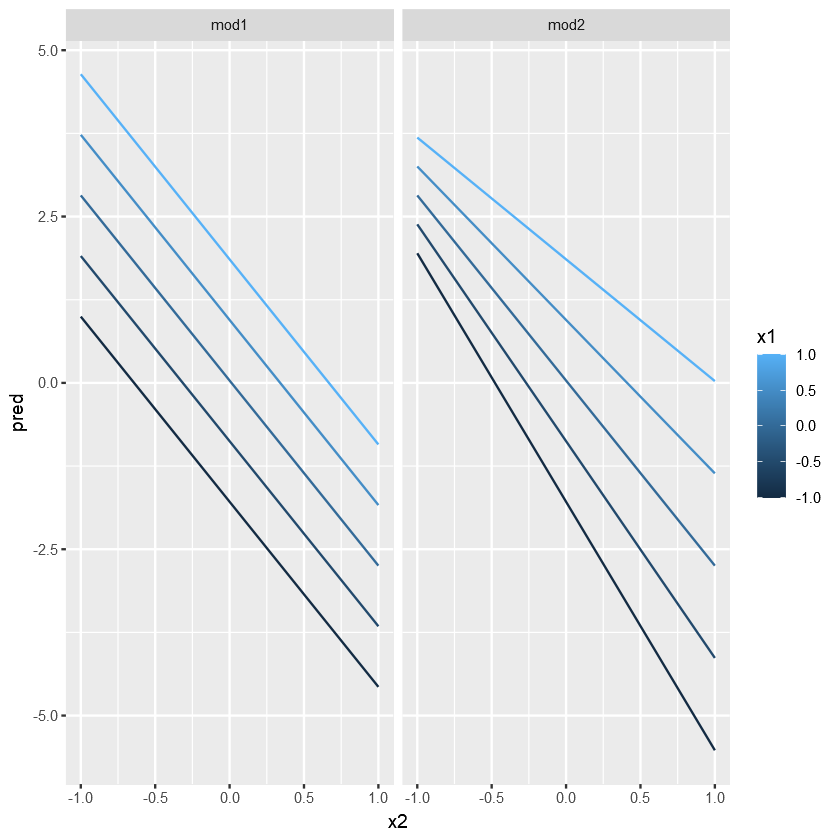

In [177]:
ggplot(grid, aes(x1, pred, color = x2, group = x2)) + 
    geom_line() + 
    facet_wrap(~ model)

ggplot(grid, aes(x2, pred, color = x1, group = x1)) + 
    geom_line() + 
    facet_wrap(~ model)

### 변환

In [178]:
df <- tribble(
    ~y, ~x,
    1, 1,
    2, 2,
    3, 3
)
model_matrix(df, y ~ x^2 + x)

(Intercept),x
<dbl>,<dbl>
1,1
1,2
1,3


In [179]:
model_matrix(df, y ~ I(x^2) + x)

(Intercept),I(x^2),x
<dbl>,<dbl>,<dbl>
1,1,1
1,4,2
1,9,3


In [180]:
model_matrix(df, y ~ poly(x, 2))

(Intercept),"poly(x, 2)1","poly(x, 2)2"
<dbl>,<dbl>,<dbl>
1,-7.071068e-01,0.4082483
1,-7.850462e-17,-0.8164966
1,7.071068e-01,0.4082483


### 스플라인 회귀
- ns(x, 2)

In [181]:
library(splines)
model_matrix(df, y ~ ns(x, 2))

(Intercept),"ns(x, 2)1","ns(x, 2)2"
<dbl>,<dbl>,<dbl>
1,0.0000000,0.0000000
1,0.5662628,-0.2108419
1,0.3440969,0.7706021


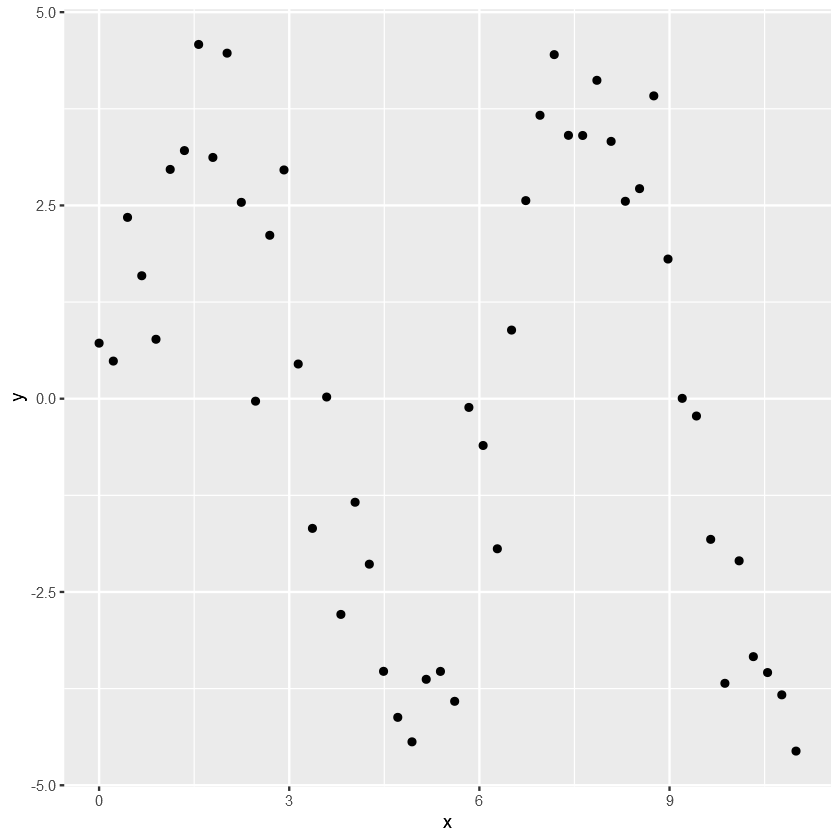

In [182]:
sim5 <- tibble(
    x = seq(0, 3.5 * pi, length = 50),
    y = 4 * sin(x) + rnorm(length(x))
) 
ggplot(sim5, aes(x, y)) + geom_point()

In [183]:
mod1 <- lm(y ~ ns(x, 1), sim5)
mod2 <- lm(y ~ ns(x, 2), sim5)
mod3 <- lm(y ~ ns(x, 3), sim5)
mod4 <- lm(y ~ ns(x, 4), sim5)
mod5 <- lm(y ~ ns(x, 5), sim5)

In [184]:
grid <- sim5 %>%
    data_grid(x = seq_range(x, n = 50, expand = 0.1)) %>%
    gather_predictions(mod1, mod2, mod3, mod4, mod5, .pred = "y")
grid %>% print

# A tibble: 250 x 3
   model       x     y
   <chr>   <dbl> <dbl>
 1 mod1  -0.550   1.77
 2 mod1  -0.303   1.71
 3 mod1  -0.0561  1.65
 4 mod1   0.191   1.59
 5 mod1   0.438   1.52
 6 mod1   0.684   1.46
 7 mod1   0.931   1.40
 8 mod1   1.18    1.34
 9 mod1   1.42    1.27
10 mod1   1.67    1.21
# ... with 240 more rows


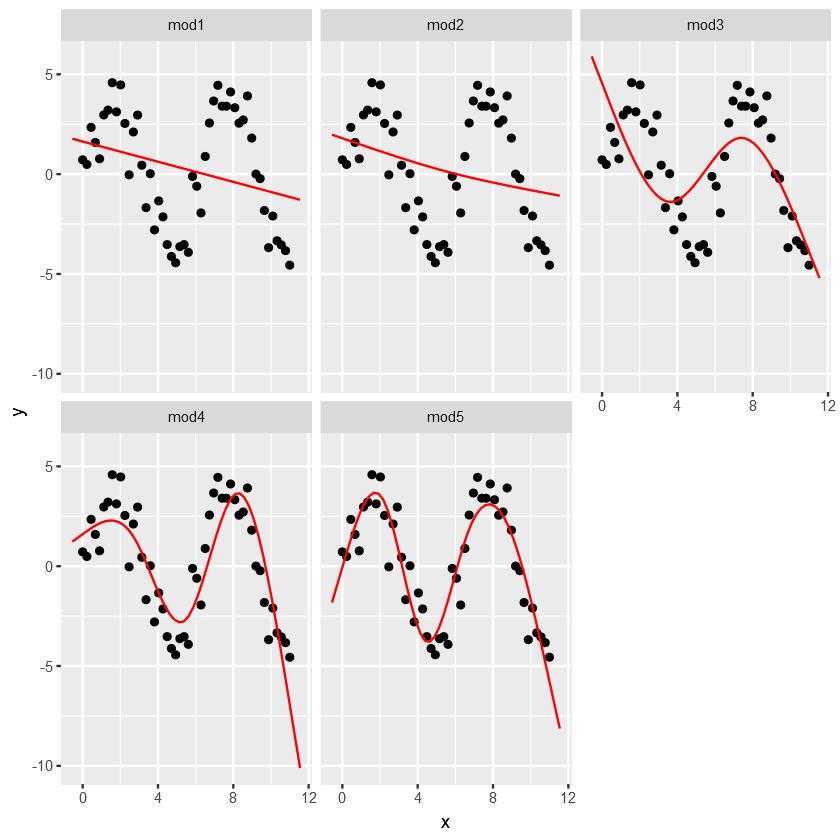

In [185]:
ggplot(sim5, aes(x, y)) + 
    geom_point() +
    geom_line(data = grid, color = "red") +
    facet_wrap(~ model)

In [186]:
# 18.4.5
# 1
mod2a <- lm(y ~ x - 1, data = sim2)
mod2 <- lm(y ~ x, data = sim2)
grid <- sim2 %>%
  data_grid(x) %>%
  spread_predictions(mod2, mod2a)
grid

x,mod2,mod2a
<chr>,<dbl>,<dbl>
a,1.152166,1.152166
b,8.116039,8.116039
c,6.127191,6.127191
d,1.910981,1.910981


In [188]:
# 2
x3 <- model_matrix(y ~ x1 * x2, data = sim3)
x3 %>% print

# A tibble: 240 x 8
   `(Intercept)`    x1   x2b   x2c   x2d `x1:x2b` `x1:x2c` `x1:x2d`
           <dbl> <dbl> <dbl> <dbl> <dbl>    <dbl>    <dbl>    <dbl>
 1             1     1     0     0     0        0        0        0
 2             1     1     0     0     0        0        0        0
 3             1     1     0     0     0        0        0        0
 4             1     1     1     0     0        1        0        0
 5             1     1     1     0     0        1        0        0
 6             1     1     1     0     0        1        0        0
 7             1     1     0     1     0        0        1        0
 8             1     1     0     1     0        0        1        0
 9             1     1     0     1     0        0        1        0
10             1     1     0     0     1        0        0        1
# ... with 230 more rows


In [189]:
x4 <- model_matrix(y ~ x1 * x2, data = sim4)
x4 %>% print

# A tibble: 300 x 4
   `(Intercept)`    x1     x2 `x1:x2`
           <dbl> <dbl>  <dbl>   <dbl>
 1             1    -1 -1       1    
 2             1    -1 -1       1    
 3             1    -1 -1       1    
 4             1    -1 -0.778   0.778
 5             1    -1 -0.778   0.778
 6             1    -1 -0.778   0.778
 7             1    -1 -0.556   0.556
 8             1    -1 -0.556   0.556
 9             1    -1 -0.556   0.556
10             1    -1 -0.333   0.333
# ... with 290 more rows


In [201]:
# 3
mod1 <- lm(y ~ x1 + x2, data = sim3)
mod1
mod2 <- lm(y ~ x1 * x2, data = sim3)
mod2


Call:
lm(formula = y ~ x1 + x2, data = sim3)

Coefficients:
(Intercept)           x1          x2b          x2c          x2d  
     1.8717      -0.1967       2.8878       4.8057       2.3596  



Call:
lm(formula = y ~ x1 * x2, data = sim3)

Coefficients:
(Intercept)           x1          x2b          x2c          x2d       x1:x2b  
    1.30124     -0.09302      7.06938      4.43090      0.83455     -0.76029  
     x1:x2c       x1:x2d  
    0.06815      0.27728  


In [192]:
model_matrix_mod1 <- function(.data) {
  mutate(.data,
    x2b = as.numeric(x2 == "b"),
    x2c = as.numeric(x2 == "c"),
    x2d = as.numeric(x2 == "d"),
    `(Intercept)` = 1
  ) %>%
    select(`(Intercept)`, x1, x2b, x2c, x2d)
}
model_matrix_mod1(sim3) %>% print

# A tibble: 240 x 5
   `(Intercept)`    x1   x2b   x2c   x2d
           <dbl> <int> <dbl> <dbl> <dbl>
 1             1     1     0     0     0
 2             1     1     0     0     0
 3             1     1     0     0     0
 4             1     1     1     0     0
 5             1     1     1     0     0
 6             1     1     1     0     0
 7             1     1     0     1     0
 8             1     1     0     1     0
 9             1     1     0     1     0
10             1     1     0     0     1
# ... with 230 more rows


In [195]:
model_matrix_mod1b <- function(.data) {
  lvls <- levels(.data$x2)
  lvls <- lvls[2:length(lvls)]
  for (lvl in lvls) {
    varname <- str_c("x2", lvl)
    .data[[varname]] <- as.numeric(.data$x2 == lvl)
  }
  x2_variables <- str_c("x2", lvls)
  .data[["(Intercept)"]] <- 1
  select(.data, `(Intercept)`, x1, all_of(x2_variables))
}
model_matrix_mod1b(sim3) %>% print

# A tibble: 240 x 5
   `(Intercept)`    x1   x2b   x2c   x2d
           <dbl> <int> <dbl> <dbl> <dbl>
 1             1     1     0     0     0
 2             1     1     0     0     0
 3             1     1     0     0     0
 4             1     1     1     0     0
 5             1     1     1     0     0
 6             1     1     1     0     0
 7             1     1     0     1     0
 8             1     1     0     1     0
 9             1     1     0     1     0
10             1     1     0     0     1
# ... with 230 more rows


In [198]:
model_matrix_mod2 <- function(.data) {
  mutate(.data,
    `(Intercept)` = 1,
    x2b = as.numeric(x2 == "b"),
    x2c = as.numeric(x2 == "c"),
    x2d = as.numeric(x2 == "d"),
    `x1:x2b` = x1 * x2b,
    `x1:x2c` = x1 * x2c,
    `x1:x2d` = x1 * x2d
  ) %>%
    select(`(Intercept)`, x1, x2b, x2c, x2d, `x1:x2b`, `x1:x2c`, `x1:x2d`)
}
model_matrix_mod2(sim3) %>% print

# A tibble: 240 x 8
   `(Intercept)`    x1   x2b   x2c   x2d `x1:x2b` `x1:x2c` `x1:x2d`
           <dbl> <int> <dbl> <dbl> <dbl>    <dbl>    <dbl>    <dbl>
 1             1     1     0     0     0        0        0        0
 2             1     1     0     0     0        0        0        0
 3             1     1     0     0     0        0        0        0
 4             1     1     1     0     0        1        0        0
 5             1     1     1     0     0        1        0        0
 6             1     1     1     0     0        1        0        0
 7             1     1     0     1     0        0        1        0
 8             1     1     0     1     0        0        1        0
 9             1     1     0     1     0        0        1        0
10             1     1     0     0     1        0        0        1
# ... with 230 more rows


In [199]:
model_matrix_mod2b <- function(.data) {
  out <- model_matrix_mod1b(.data)
  x2cols <- str_subset(colnames(out), "^x2")
  for (varname in x2cols) {
    newvar <- str_c("x1:", varname)
    out[[newvar]] <- out$x1 * out[[varname]]
  }
  out
}
model_matrix_mod2b(sim3) %>% print

# A tibble: 240 x 8
   `(Intercept)`    x1   x2b   x2c   x2d `x1:x2b` `x1:x2c` `x1:x2d`
           <dbl> <int> <dbl> <dbl> <dbl>    <dbl>    <dbl>    <dbl>
 1             1     1     0     0     0        0        0        0
 2             1     1     0     0     0        0        0        0
 3             1     1     0     0     0        0        0        0
 4             1     1     1     0     0        1        0        0
 5             1     1     1     0     0        1        0        0
 6             1     1     1     0     0        1        0        0
 7             1     1     0     1     0        0        1        0
 8             1     1     0     1     0        0        1        0
 9             1     1     0     1     0        0        1        0
10             1     1     0     0     1        0        0        1
# ... with 230 more rows


In [207]:
# 4
mod1 <- lm(y ~ x1 + x2, data = sim4)
mod2 <- lm(y ~ x1 * x2, data = sim4)
sim4_mods <- gather_residuals(sim4, mod1, mod2)
sim4_mods %>% print

# A tibble: 600 x 6
   model    x1     x2   rep       y  resid
   <chr> <dbl>  <dbl> <int>   <dbl>  <dbl>
 1 mod1     -1 -1         1  4.25    3.25 
 2 mod1     -1 -1         2  1.21    0.210
 3 mod1     -1 -1         3  0.353  -0.643
 4 mod1     -1 -0.778     1 -0.0467 -0.425
 5 mod1     -1 -0.778     2  4.64    4.26 
 6 mod1     -1 -0.778     3  1.38    0.999
 7 mod1     -1 -0.556     1  0.975   1.22 
 8 mod1     -1 -0.556     2  2.50    2.74 
 9 mod1     -1 -0.556     3  2.70    2.95 
10 mod1     -1 -0.333     1  0.558   1.42 
# ... with 590 more rows


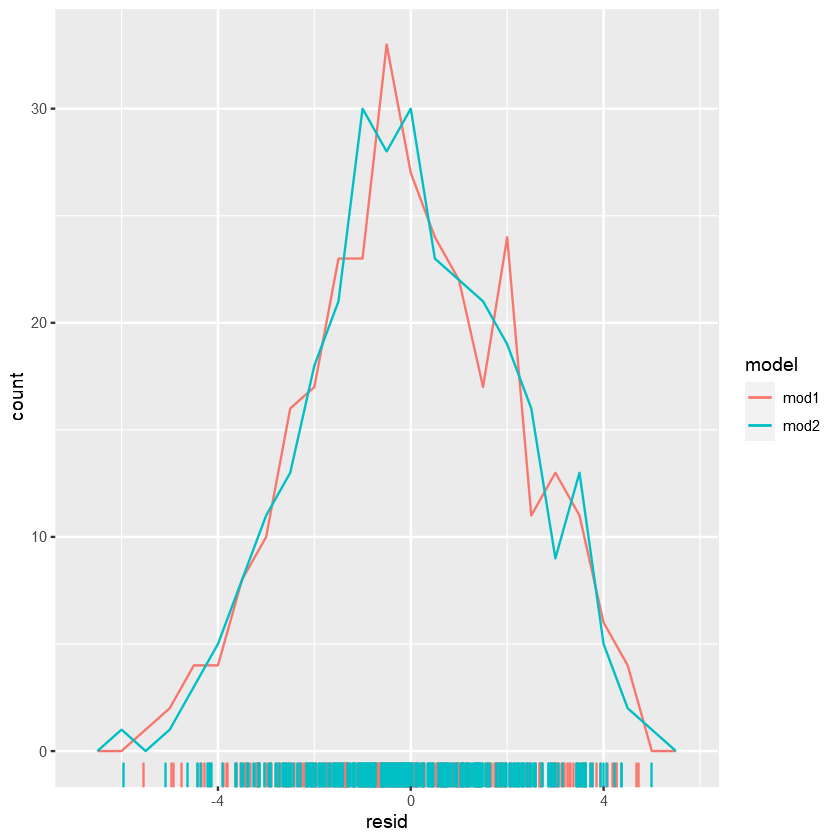

In [204]:
ggplot(sim4_mods, aes(x = resid, colour = model)) +
  geom_freqpoly(binwidth = 0.5) +
  geom_rug()

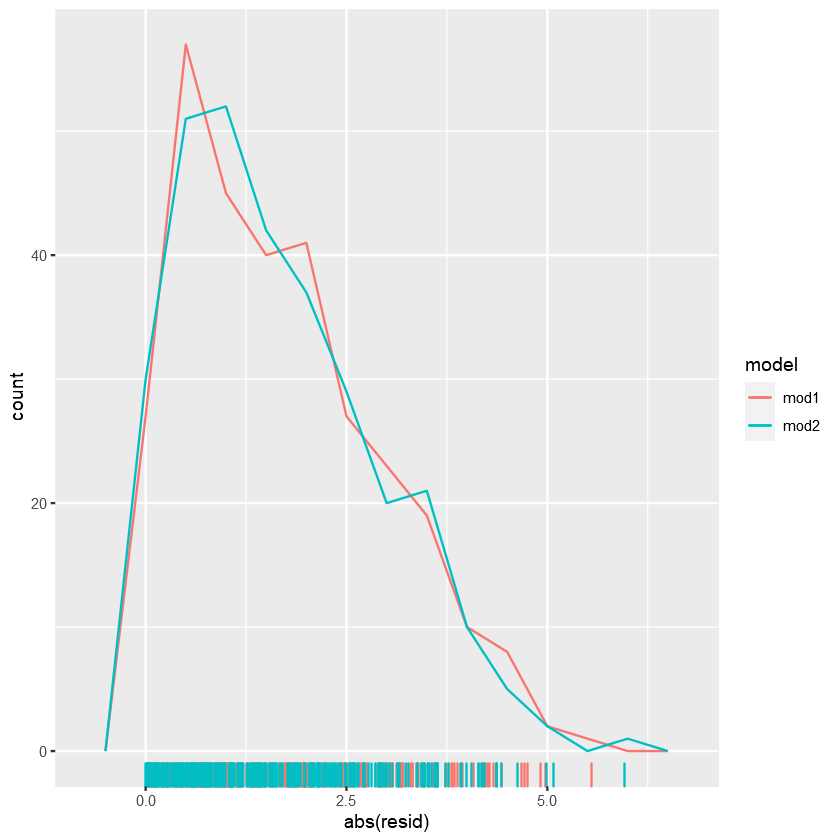

In [205]:
ggplot(sim4_mods, aes(x = abs(resid), colour = model)) +
  geom_freqpoly(binwidth = 0.5) +
  geom_rug()

In [208]:
sim4_mods %>%
  group_by(model) %>%
  summarise(resid = sd(resid))

model,resid
<chr>,<dbl>
mod1,2.103281
mod2,2.067068


### 결측값
- lm(y ~ x, df, na.action = na.exclude) : 결측값 제외
- nobs() : 얼마만큼의 관측값이 사용되었는지 집계

In [213]:
df <- tribble(
    ~x, ~y,
    1, 2.2,
    2, NA,
    3, 3.5,
    4, 8.3,
    NA, 10
)
mod <- lm(y ~ x, df, na.action = na.exclude)

In [214]:
nobs(mod)

[1] 3

### 다른 모델

### 일반화 선형 모형 : stats::glm()
- 연속형이 아닌 이항 데이터 도는 빈도수 데이터를 포함할 수 있도록 선형 모형을 확장
- 우도의 통계적 아이디어를 기반으로 거리 메트릭을 정의

<br/>

### 일반화 가법 모형 : mgcv::gam()
- 일반화 선형 모형을 확장하여 임의의 평활 함수를 포함
- y ~ s(x)형식의 수식을 작성, 평활도를 제한조건으로 설정

<br/>

### 벌점 선형 모형 : glmnet::glmnet()
- 복잡한 모델에 벌점을 부과하는 페널티 항 (모수 벡터와 원점 사이의 거리로 정의되는) 차이도에 추가
- 같은 모집단의 새로운 데이터셋을 좀더 일반화할 수 있는 모델을 만드는 경향

<br/>

### 로버스트 선형 모형 : MASS:rlm()
- 이상치에 덜 민감하도록 만듬

<br/>

### 트리 모형 : rapart::rpart()
### 랜덤 포레스트 : randomForest::randomForest()
### 그레이디언트 부스팅 : xgboost::xgboost()